In [2]:
# data exploration
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.preprocessing import Imputer
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


In [3]:
trainval = pd.read_csv("train.csv")
trainval_Y = trainval['BikeBuyer']
# trainval_input = trainval.drop(columns='BikeBuyer', axis=1)
# select columns starting from Education to the last column
trainval_input = trainval.drop(columns='BikeBuyer', axis=1)
print("num of rows in training and validation: ", len(trainval_input)) #11615
test_input = pd.read_csv("test.csv")
print("num of rows in test: ", len(test_input)) #4904
full_input = pd.concat( [trainval_input, test_input], axis=0)
# concatenate rows, need to reindex row numbers
# drop=True, don't make a new column which values are the old indices(row names)
full_input.reset_index(drop=True, inplace=True)
print(full_input.head())
print("num of rows in full: ", len(full_input)) #16519


num of rows in training and validation:  11615
num of rows in test:  4904
   CustomerID FirstName LastName      AddressLine1         City  \
0           0       Jon     Yang   3761 N. 14th St  Rockhampton   
1           1    Eugene    Huang        2243 W St.      Seaford   
2           2     Ruben   Torres  5844 Linden Land       Hobart   
3           3   Christy      Zhu  1825 Village Pl.   North Ryde   
4           6     Janet  Alvarez     2612 Berry Dr   Matraville   

  StateProvinceName CountryRegionName PostalCode          PhoneNumber  \
0        Queensland         Australia       4700  1 (11) 500 555-0162   
1          Victoria         Australia       3198  1 (11) 500 555-0110   
2          Tasmania         Australia       7001  1 (11) 500 555-0184   
3   New South Wales         Australia       2113  1 (11) 500 555-0162   
4   New South Wales         Australia       2036  1 (11) 500 555-0184   

    BirthDate   Education    Occupation Gender MaritalStatus  HomeOwnerFlag  \
0  19

In [4]:
# convert BirthDate to Age: assume data is collected in year 2019
age = pd.DataFrame()
age['Age'] = full_input['BirthDate'].apply(lambda str: 2019 - int(str.split('-')[0]))
print(age.describe())
# I get min age to buy a motorcycle is 39, the max age to buy a motorcycle is 109.
# I can conclude that the data is not collected in 2019. I will normalize the age attribute.
# replace original items after normalization
min_max_scaler = preprocessing.MinMaxScaler(copy=False)
age['Age'] = min_max_scaler.fit_transform(age)
# print(age.describe())

full_X = pd.concat( [ age,  full_input[full_input.columns[10:]]] , axis=1 )
print(full_X.head())

                Age
count  16519.000000
mean      57.457292
std       11.245679
min       39.000000
25%       49.000000
50%       56.000000
75%       65.000000
max      109.000000
        Age   Education    Occupation Gender MaritalStatus  HomeOwnerFlag  \
0  0.200000  Bachelors   Professional      M             M              1   
1  0.214286  Bachelors   Professional      M             S              0   
2  0.214286  Bachelors   Professional      M             M              1   
3  0.171429  Bachelors   Professional      F             S              0   
4  0.214286  Bachelors   Professional      F             S              1   

   NumberCarsOwned  NumberChildrenAtHome  TotalChildren  YearlyIncome  \
0                0                     0              2        137947   
1                1                     3              3        101141   
2                1                     3              3         91945   
3                1                     0              0         8

        Age   Education    Occupation Gender MaritalStatus  HomeOwnerFlag  \
0  0.200000  Bachelors   Professional      M             M              1   
1  0.214286  Bachelors   Professional      M             S              0   
2  0.214286  Bachelors   Professional      M             M              1   
3  0.171429  Bachelors   Professional      F             S              0   
4  0.214286  Bachelors   Professional      F             S              1   

   NumberCarsOwned  NumberChildrenAtHome  TotalChildren  YearlyIncome  \
0                0                     0              2        137947   
1                1                     3              3        101141   
2                1                     3              3         91945   
3                1                     0              0         86688   
4                1                     0              0         84756   

   AveMonthSpend  BikeBuyer  
0             89          0  
1            117          1  
2       

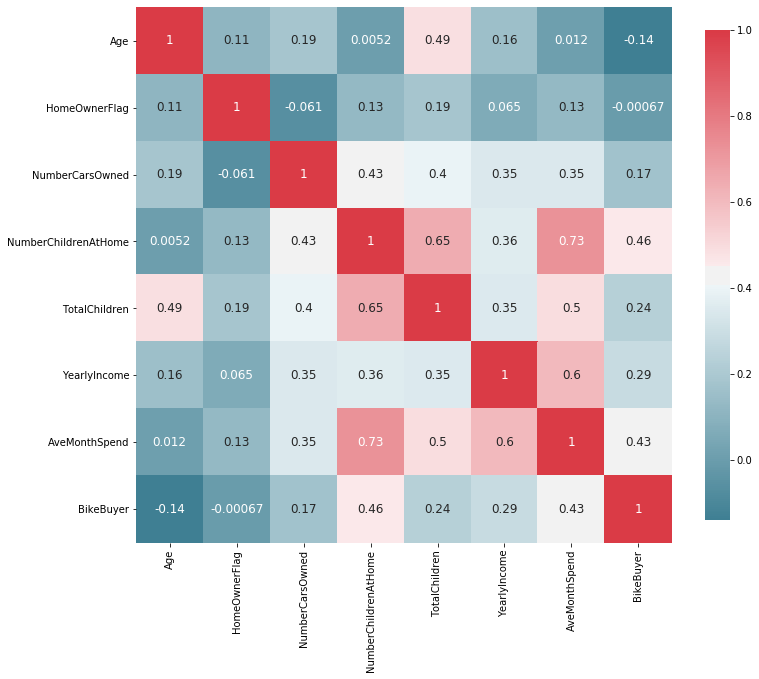

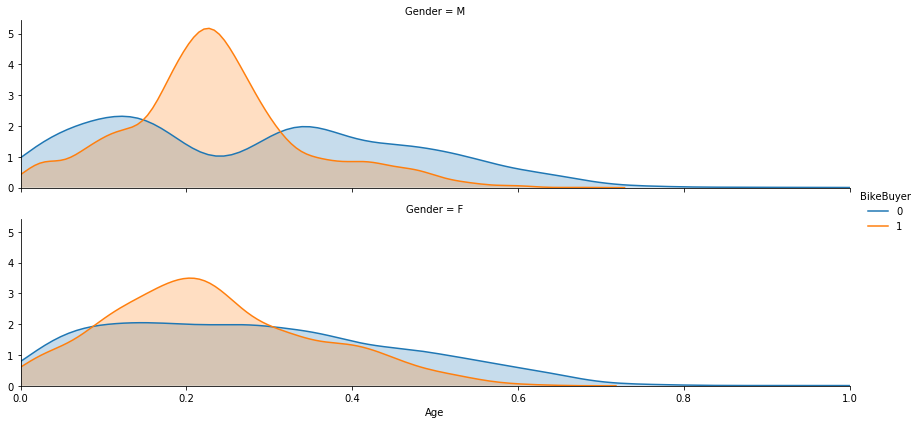

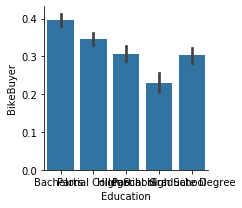

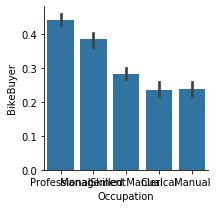

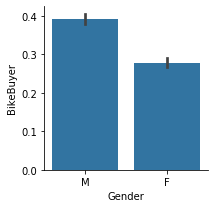

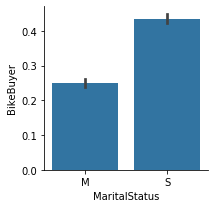

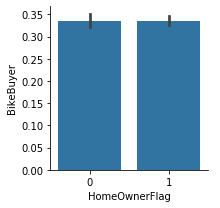

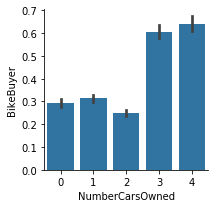

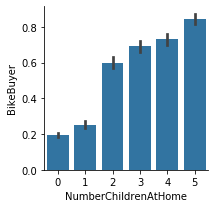

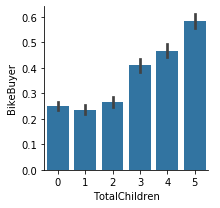

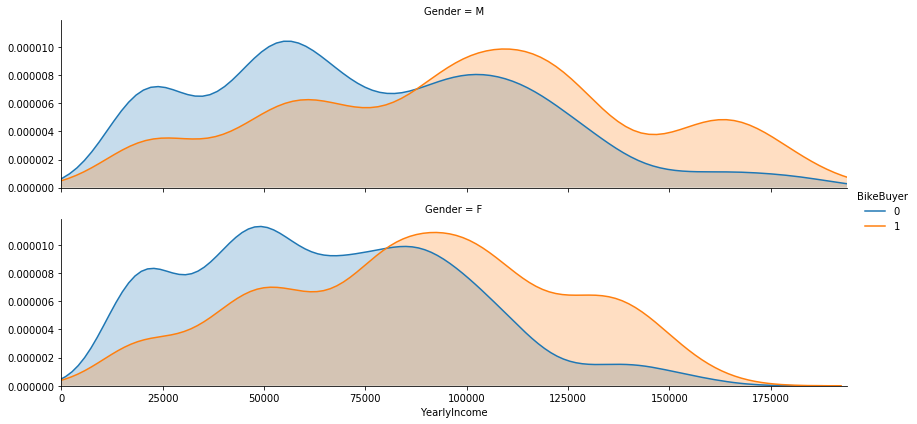

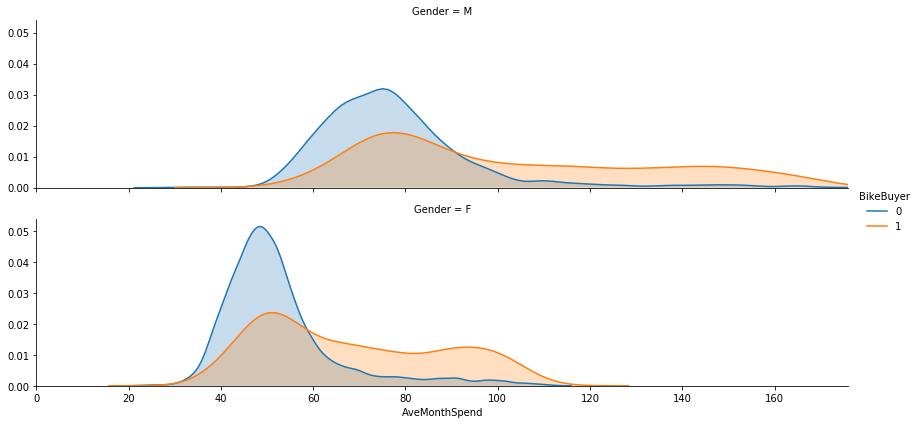

In [5]:
# data exploration
trainval_X_obs = full_X[:11615]
trainval_XY_obs = pd.concat([trainval_X_obs, trainval_Y], axis=1)
print(trainval_XY_obs.head())

def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
plot_correlation_map( trainval_XY_obs )

plot_distribution( trainval_XY_obs , var = 'Age' , target = 'BikeBuyer', row='Gender')
plot_categories( trainval_XY_obs , cat = 'Education' , target = 'BikeBuyer')
plot_categories( trainval_XY_obs , cat = 'Occupation' , target = 'BikeBuyer')
plot_categories( trainval_XY_obs , cat = 'Gender' , target = 'BikeBuyer')
plot_categories( trainval_XY_obs , cat = 'MaritalStatus' , target = 'BikeBuyer' )
# for HomeOwnerFlag, BikeBuyer predictor is almost same for two categories,
# I won't use this to predict 
plot_categories( trainval_XY_obs , cat = 'HomeOwnerFlag' , target = 'BikeBuyer' )
plot_categories( trainval_XY_obs , cat = 'NumberCarsOwned' , target = 'BikeBuyer' )
plot_categories( trainval_XY_obs , cat = 'NumberChildrenAtHome' , target = 'BikeBuyer' )
plot_categories( trainval_XY_obs , cat = 'TotalChildren' , target = 'BikeBuyer' )
plot_distribution( trainval_XY_obs , var = 'YearlyIncome' , target = 'BikeBuyer', row='Gender')
plot_distribution( trainval_XY_obs , var = 'AveMonthSpend' , target = 'BikeBuyer', row='Gender')


In [6]:
# drop some unnecessary features of input according to data exploraion
# drop HomeOwnerFlag feature because it doesn't affect BikeBuyer obviously
# trainval_X = full_X.iloc[:11615]
# test_X = full_X.iloc[11615:]
# print(trainval_X.head())

# convert categorical variables to numeric variables
education = pd.get_dummies( full_X.Education , prefix='Education' )
# print(education.head())
occupation = pd.get_dummies( full_X.Occupation , prefix='Occupation' )
# print(occupation.head())
gender = pd.Series( np.where( full_X.Gender == 'M' , 1 , 0 ) , name = 'Gender' )
married = pd.Series(np.where( full_X.MaritalStatus == 'M' , 1 , 0 ) , name='MaritalStatus')
numericals = full_X[full_X.columns[6:]]

full_X_preprocessed = pd.concat([age, education, occupation, gender, married, numericals], axis=1)
print(full_X_preprocessed.head())



        Age  Education_Bachelors   Education_Graduate Degree  \
0  0.200000                     1                          0   
1  0.214286                     1                          0   
2  0.214286                     1                          0   
3  0.171429                     1                          0   
4  0.214286                     1                          0   

   Education_High School  Education_Partial College  \
0                      0                          0   
1                      0                          0   
2                      0                          0   
3                      0                          0   
4                      0                          0   

   Education_Partial High School  Occupation_Clerical  Occupation_Management  \
0                              0                    0                      0   
1                              0                    0                      0   
2                              0            

In [7]:
# cross validation for RandomForest: choosing best parameters
import mglearn
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

trainval_X_preprocessed = full_X_preprocessed[:11615]
#Set the parameters you want to evaluate 

param_grid = {'n_estimators':  [1, 5, 10, 15, 20],
              'max_depth': [1, 3, 5, 7, 10],
              'min_impurity_decrease': [0.005, 0.01, 0.05, 0.1, 0.3],
             }
#create the GridSearch object for the Random Forest classifier passing the parameters
grid_search = GridSearchCV(RandomForestClassifier(criterion='entropy', random_state=10), param_grid, cv=5)

#fit data to the model -- cross validation will be performed during grid search
# have to convert categorical to numerical for fit function
grid_search.fit(trainval_X_preprocessed, trainval_Y)
 

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#you can also print the best estimator:
print("Best estimator:\n{}".format(grid_search.best_estimator_))
# print("Test set score: {:.2f}".format(grid_search.score(test_X, y_test)))


Best parameters: {'max_depth': 5, 'min_impurity_decrease': 0.005, 'n_estimators': 20}
Best cross-validation score: 0.78
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)


In [8]:
# predict with RandomForest best parameters
test_X = full_X_preprocessed[11615:]
predicted_Y = grid_search.best_estimator_.predict(test_X)
result = pd.DataFrame()
result['CustomerID'] = test_input['CustomerID']
result['BikeBuyer'] = predicted_Y
result.to_csv('result_RandomForest.csv', header=True, index=None)

In [9]:
# KNN needs to preprocess data: related to distance, so normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
# numericals = full_X[full_X.columns[6:]]
numericals_normalized = min_max_scaler.fit_transform(numericals)
numericals_processed = pd.DataFrame(data=numericals_normalized, columns=numericals.columns)
full_X_preprocessed_norm = pd.concat([age, education, occupation, gender, married, numericals_processed], axis=1)

In [10]:
# KNN crossvalidation
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()

# cross validation: choosing best parameters
import mglearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

trainval_X_preprocessed_norm = full_X_preprocessed_norm[:11615]
#Set the parameters you want to evaluate 

param_grid = {'n_neighbors':  [1, 5, 10, 12, 15, 18, 20, 25, 30, 35, 40]}             
#create the GridSearch object for the Random Forest classifier passing the parameters
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

#fit data to the model -- cross validation will be performed during grid search
# have to convert categorical to numerical for fit function
grid_search.fit(trainval_X_preprocessed_norm, trainval_Y)
 

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#you can also print the best estimator:
print("Best estimator:\n{}".format(grid_search.best_estimator_))
# print("Test set score: {:.2f}".format(grid_search.score(test_X, y_test)))

Best parameters: {'n_neighbors': 15}
Best cross-validation score: 0.79
Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')


In [11]:
# predict with KNN
test_X = full_X_preprocessed_norm[11615:]
predicted_Y = grid_search.best_estimator_.predict(test_X)
result = pd.DataFrame()
result['CustomerID'] = test_input['CustomerID']
result['BikeBuyer'] = predicted_Y
result.to_csv('result_knn.csv', header=True, index=None)